# 8 Steps Of Machine Learning
* Data Gathering
* Data pre-processing
* Feature Engineering
* Choosing Model
* Training Model
* Test Model/ Model Evaluation
* Parameter Tuning
* Prediction


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Data Gathering
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import model_selection
import seaborn as sns
df = pd.read_csv("FuelConsumption.csv")
df.head()
df.describe()

#data Pre-Processing
df.info()
data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
data.info()

## Feature Engineering Analyssis
corr = data.corr()
# sns.heatmap(corr)
# sns.pairplot(data)
data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

## Split data into training and test set
X = data[["ENGINESIZE","FUELCONSUMPTION_COMB"]]
Y = data[["CO2EMISSIONS"]]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
<cla

## Linear Regression

In [25]:
## Choosing Model
#Init
model = linear_model.LinearRegression()

## Train Model
model.fit(xtrain, ytrain)
print(model.score(xtrain, ytrain))

## Predict/Test
yhat = model.predict(xtest)

## Metrics Evaluation
print("MSE: ", mean_squared_error(yhat, ytest))
print("R2 Score: ", r2_score(yhat, ytest))
print(xtrain.shape, ytrain.shape)


# Regression Analyssis
line1 = np.linspace(1, 8.4, 853).reshape(-1, 1)
line2 = np.linspace(1, 8.4, 853).reshape(-1, 1)
line3 = np.linspace(1, 8.4, 853).reshape(-1, 1)
lines = pd.DataFrame(
    {
        "E": line1[:, 0],
        "C": line2[:, 0],
        "F": line3[:, 0]
    }
)

# fig, axes = plt.subplots(1, 1, figsize=(10, 6))
# axes.scatter(xtrain[["ENGINESIZE"]], ytrain, label="Actual Data", c="hotpink")
# axes.plot(lines[["E"]].values, model.predict(lines), label="Regression Line", c="darkorange")
# axes.legend()
# axes.set_xlabel("EngineSize")
# axes.set_ylabel("CO2Emission")
# plt.show()


0.8587780560563772
MSE:  585.5245034046521
R2 Score:  0.8419548727356092
(853, 2) (853, 1)


================== Fold ================
MSE:  492.4652138889949
R2 Score:  0.8563746991791382
================== Fold ================
MSE:  1166.1509188516175
R2 Score:  0.7610611039444628
================== Fold ================
MSE:  740.2786288987121
R2 Score:  0.8128139071191258
================== Fold ================
MSE:  448.6668277765826
R2 Score:  0.8817597364542984
================== Fold ================
MSE:  338.59445143092626
R2 Score:  0.9032128090811866


0.8430444511556423

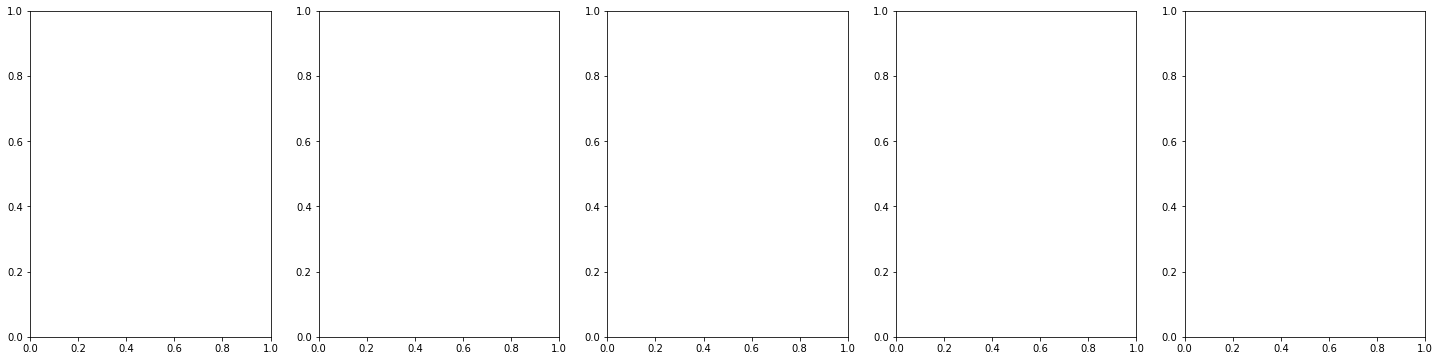

In [26]:
## KFold Cross Validation
from sklearn.model_selection import KFold

folds = KFold(n_splits=5)
accuracies = []
fig, axes = plt.subplots(1, 5, figsize=(25, 6))
for Index, axis in zip(folds.split(X), axes):
    ##Training data
    xtrain = X.iloc[Index[0]]
    ytrain = Y.iloc[Index[0]]

    ## Testing
    xtest = X.iloc[Index[1]]
    ytest = Y.iloc[Index[1]]

    ## Model
    model = linear_model.LinearRegression()
    
    ## Train Model
    model.fit(xtrain, ytrain)

    ## Test Prediction
    ypred = model.predict(xtest)

    ## Evaluation Metrices
    print("================== Fold ================")
    print("MSE: ", mean_squared_error(ypred, ytest))
    print("R2 Score: ", r2_score(ytest, ypred))

    accuracies.append(r2_score(ytest, ypred))

    ## Regression Analyssis
#     line = np.linspace(1, 8.4, 853).reshape(-1, 1)
#     axis.scatter(xtrain, ytrain, label="Actual Data", c="hotpink")
#     axis.plot(line, model.predict(line), label="Regression Line", c="black", linewidth=5)
#     axis.legend()
#     axis.set_xlabel("EngineSize")
#     axis.set_ylabel("CO2Emission")
# plt.show()
    
sum(accuracies)/len(accuracies)


In [27]:
## Cross val score
from sklearn import model_selection
model = linear_model.LinearRegression()

# metrics.SCORERS.keys()
cv = model_selection.cross_val_score(
    model,
    X,Y,
    cv=5,
    scoring='r2', verbose=4
)
cv.mean()


[CV] END ................................ score: (test=0.856) total time=   0.0s
[CV] END ................................ score: (test=0.761) total time=   0.0s
[CV] END ................................ score: (test=0.813) total time=   0.0s
[CV] END ................................ score: (test=0.882) total time=   0.0s
[CV] END ................................ score: (test=0.903) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.8430444511556423

In [28]:
list(zip([1,2,3], ['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

# KNN Regression

In [29]:
### KNN
from sklearn import neighbors

#MOdel INit
knn_model = neighbors.KNeighborsRegressor(n_neighbors=3)

## MOdel Training
knn_model.fit(xtrain, ytrain)

## Test Prediction
knn_model.predict([[2.8, 9.4]])
ypred = knn_model.predict(xtest)


## Evaluation
print("MSE: ", mean_squared_error(ypred, ytest))
print("R2 Score: ", r2_score(ypred, ytest))

## Hyper Prameter Tuning
for k in range(3,30,2):
    knn_model = neighbors.KNeighborsRegressor(n_neighbors=k, weights="distance")

    ## MOdel Training
    knn_model.fit(xtrain, ytrain)

    ## Test Prediction
    ypred = knn_model.predict(xtest)


    ## Evaluation
    print("k=", k)
    print("MSE: ", mean_squared_error(ypred, ytest))
    print("R2 Score: ", r2_score(ypred, ytest))



MSE:  132.30620761606673
R2 Score:  0.9610584746766396
k= 3
MSE:  109.8098317092952
R2 Score:  0.9677666479436966
k= 5
MSE:  92.21627702762024
R2 Score:  0.9726583959996952
k= 7
MSE:  99.27452906899049
R2 Score:  0.9702077958209124
k= 9
MSE:  108.59305404107631
R2 Score:  0.9669144264144709
k= 11
MSE:  110.42421529569029
R2 Score:  0.9661490176955009
k= 13
MSE:  107.41626387155904
R2 Score:  0.9672109168213212
k= 15
MSE:  108.49418045332386
R2 Score:  0.9667057834382252
k= 17
MSE:  107.87738089047572
R2 Score:  0.966807072560549
k= 19
MSE:  106.5095661303035
R2 Score:  0.9671970943466581
k= 21
MSE:  108.01695621121145
R2 Score:  0.966253706171728
k= 23
MSE:  110.05352670532504
R2 Score:  0.9651883059132954
k= 25
MSE:  109.63957769669739
R2 Score:  0.9652210003604778
k= 27
MSE:  110.50138394047006
R2 Score:  0.9648334819345674
k= 29
MSE:  111.97698954127056
R2 Score:  0.9642838981188774


In [30]:
## Perform KFold

In [31]:
## Grid SearchCV
estimator = neighbors.KNeighborsRegressor()
grid = model_selection.GridSearchCV(
    estimator,
    param_grid={
        "n_neighbors": list(range(3, 30, 2)),
        "weights":["uniform", "distance"]
    },
    cv=5, verbose=1
)
grid.fit(X,Y)

grid.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'n_neighbors': 19, 'weights': 'distance'}

k= 9
MSE:  842.4166620529312
R2 Score:  0.762392153811607
k= 15
MSE:  783.0920761208143
R2 Score:  0.7767762199690186
k= 19
MSE:  772.6272495602336
R2 Score:  0.7790055778704459


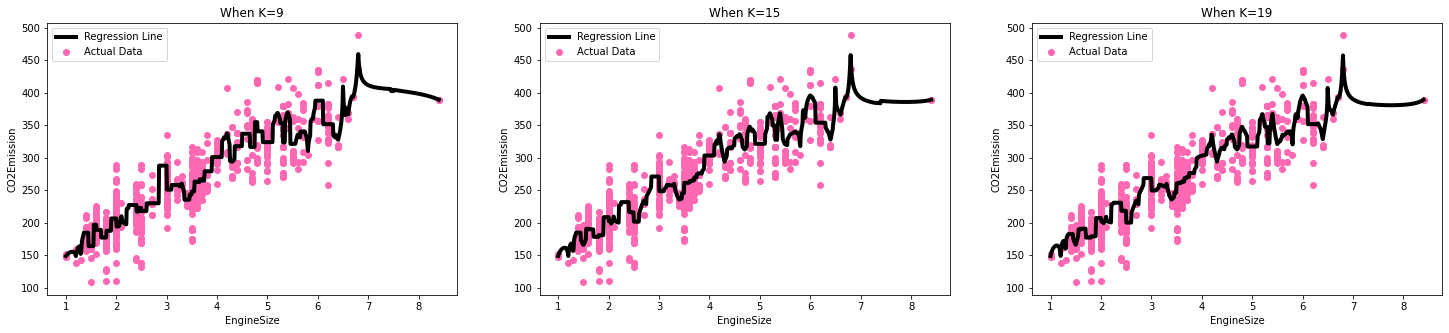

In [32]:
## KNN Analyssis
line1 = np.linspace(1, 8.4, 853).reshape(-1, 1)
## Split data into training and test set
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1)
fig, axes = plt.subplots(1,3, figsize=(25,5))
for k, axis in zip([9,15,19], axes):
    knn_model = neighbors.KNeighborsRegressor(n_neighbors=k, weights="distance")

    ## MOdel Training
    knn_model.fit(xtrain, ytrain)

    ## Test Prediction
    ypred = knn_model.predict(xtest)

    ## Evaluation
    print("k=", k)
    print("MSE: ", mean_squared_error(ypred, ytest))
    print("R2 Score: ", r2_score(ypred, ytest))

    ## Visualize
    ## Regression Analyssis
    line = np.linspace(1, 8.4, 853).reshape(-1, 1)
    axis.scatter(xtrain, ytrain, label="Actual Data", c="hotpink")
    axis.plot(line1, knn_model.predict(line1),
              label="Regression Line", c="black", linewidth=4)
    axis.legend()
    axis.set_title(f"When K={k}")
    axis.set_xlabel("EngineSize")
    axis.set_ylabel("CO2Emission")
plt.show()
    
